<a href="https://colab.research.google.com/github/Aicoaching2025/Logistic-Regression-Implementation-and-Interpretation/blob/main/Logistic_Regression_Implementation_and_Interpretation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Class distribution:
risk
0    998
1      2
Name: count, dtype: int64
Accuracy: 0.9966666666666667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       299
           1       0.00      0.00      0.00         1

    accuracy                           1.00       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.99      1.00      1.00       300



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


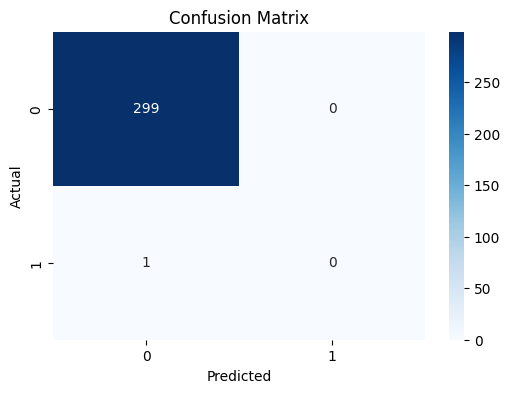

          Feature  Coefficient
0          income    -0.000202
1    credit_score    -0.003386
2  debt_to_income     0.004365
3             age     0.052260


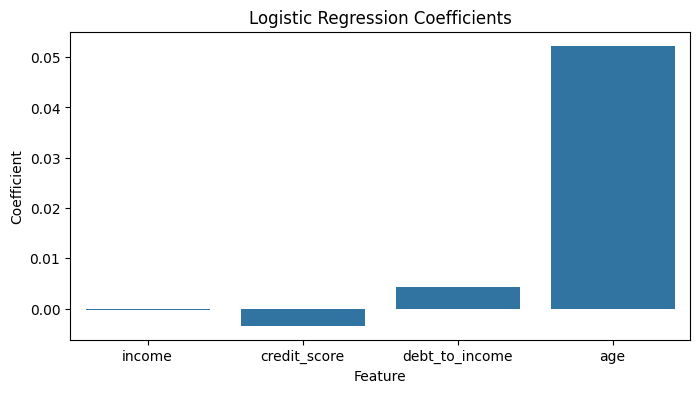

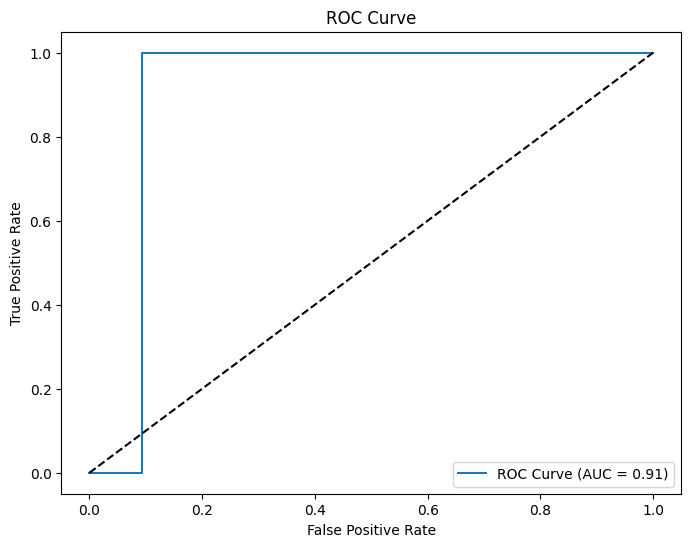

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn imports for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report

# -----------------------------------------
# Step 1: Generate Synthetic Data
# -----------------------------------------
# We create a synthetic dataset simulating financial features that might predict a binary risk outcome.
np.random.seed(42)  # For reproducibility

n_samples = 1000
# Generate synthetic features:
income = np.random.normal(50000, 15000, n_samples)         # Annual income in dollars
credit_score = np.random.normal(650, 50, n_samples)          # Credit score (range roughly 300-850)
debt_to_income = np.random.uniform(0, 0.5, n_samples)        # Debt-to-income ratio (0 to 0.5)
age = np.random.normal(40, 10, n_samples)                    # Age in years

# Create a DataFrame with these features
data = pd.DataFrame({
    'income': income,
    'credit_score': credit_score,
    'debt_to_income': debt_to_income,
    'age': age
})

# Create a binary target variable ("risk"):
# Higher risk is assumed when income and credit score are lower,
# debt-to-income is higher, and age is lower.
logit = -0.00005 * data['income'] - 0.01 * data['credit_score'] + 5 * data['debt_to_income'] - 0.02 * data['age'] + 5
prob = 1 / (1 + np.exp(-logit))

# Introduce a random threshold to create a balanced class
threshold = 0.5 + np.random.normal(0, 0.1, n_samples)  # Add random noise to 0.5 threshold
data['risk'] = (prob > threshold).astype(int)

# Check class distribution
print("Class distribution:")
print(data['risk'].value_counts())

# -----------------------------------------
# Step 2: Split Data & Train Logistic Regression
# -----------------------------------------
X = data[['income', 'credit_score', 'debt_to_income', 'age']]
y = data['risk']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Predict outcomes on the test set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# -----------------------------------------
# Step 3: Visualizations
# -----------------------------------------

# 3a. Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 3b. Coefficient Bar Chart
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print(coefficients)

plt.figure(figsize=(8, 4))
sns.barplot(x='Feature', y='Coefficient', data=coefficients)
plt.title("Logistic Regression Coefficients")
plt.show()

# 3c. ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()